In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)}) #width=15, #height=8

# 1.11 a

In [2]:
def Pn (P_prev: np.double, delta_t: float) -> np.double:
    
    return max(0 , (1 + c * delta_t * (Pm - P_prev))* P_prev)

In [3]:
c = 1.25e-9
Pm = 25e6
delta_t = 10
capacity = 0.98 * Pm  # 24500000.0

def Pn_capacity(Pa):
    n = len(Pa)
    for i in range(n):
        while(Pa[i][-1] <= capacity):
            P_next = Pn(Pa[i][-1], delta_t)
            Pa[i].append(P_next)

In [4]:
Pa = [[3e6], [22.2012e6]]

Pn_capacity(Pa) ###

print("1: {}, 2: {}\n".format((len(Pa[0]) - 1)*delta_t,(len(Pa[1]) - 1)*delta_t ))


1: 180, 2: 50



# 1.11 b

In [5]:
Pa = [[3e6], [22.2012e6]]

def Pt(Pa, t: int): 
    return Pm * Pa / (Pa + (Pm - Pa) * math.exp(-c * Pm * t))


for i in range(len(Pa)):
    time = 0
    
    while(True):
        if(Pt(Pa[i][0], time) > capacity):
            print("Pa = {}, time = {}".format(Pa[i][0], time))
            break

        time += 1

Pa = 3000000.0, time = 189
Pa = 22201200.0, time = 59


# 1.11 c

In [6]:
time = np.array([0, 25, 50, 75, 100], dtype=int)
P = np.zeros(time[-1] + 1, dtype=np.double)
P[0] = 3e6
delta_t = 5

for i in range(time[-1]):
    P[i + 1] = Pn(P[i], delta_t)

    
#calculate growth rate
growth_rate = np.array([c * (Pm - P[int(t / delta_t)]) for t in time], dtype=np.double) 

print(growth_rate)

[0.0275     0.02428818 0.01939779 0.01341537 0.00788764]


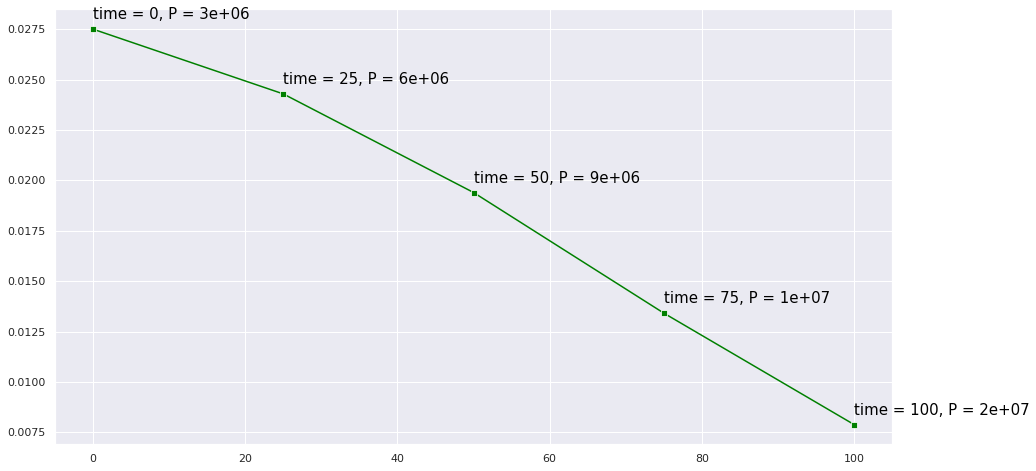

In [7]:
sns.lineplot(x = time, y = growth_rate, color="green", marker="s")

for i in range(time.shape[0]):
    plt.text(x = time[i] + 0.0005, y = growth_rate[i] + 0.0005, s = 'time = {0}, P = {1:1.0e}'.format(time[i], P[(int)(time[i]/delta_t)]), 
             fontdict=dict(color='black',size=15))

plt.show()

# 1.11 d

In [8]:
alpha = np.array([0.9, 0.95, 1.0, 1.05, 1.1], dtype=float)
n = 300
delta_t = 1


P = np.zeros((alpha.shape[0], n), dtype=np.double)

for i in range(P.shape[0]):
    P[i][0] = 25e6 * alpha[i]

for i in range(0, P.shape[0], 1):
    for j in range(0, P.shape[1] - 1, 1):
        P[i][j + 1] = Pn(P[i][j], delta_t)


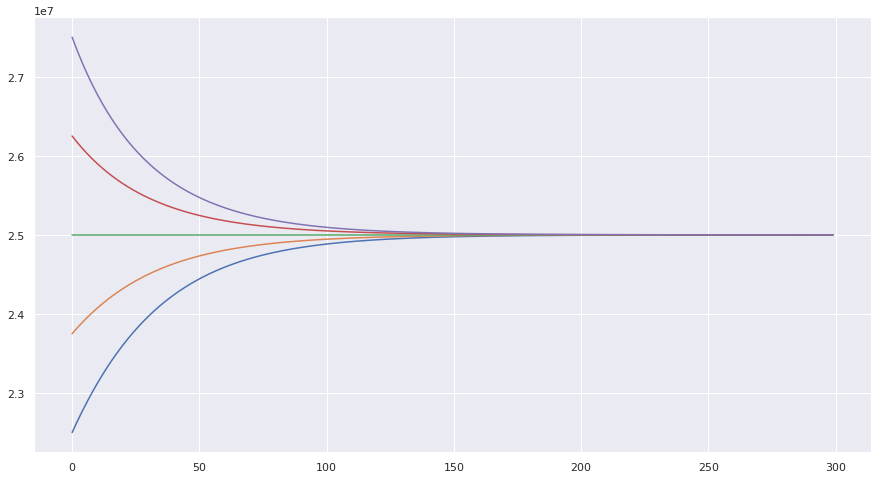

In [9]:
time_grid = [delta_t * i for i in range(P.shape[1])]

for i in range(P.shape[0]):
    sns.lineplot(x = time_grid, y = P[i])
    

plt.show()